In [1]:
%config Completer.use_jedi = False

In [2]:
import os
import pandas as pd

In [3]:
# load up chexpert as the training set
data_path = os.path.join('/','data','matt','chexpert')

In [4]:
os.path.isdir(data_path)

True

In [5]:
data_df = pd.read_csv(os.path.join(data_path, 'CheXpert-v1.0-small', 'train.csv'))

In [6]:
data_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [7]:
data_df = data_df.fillna(0)

In [8]:
data_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,0.0,0.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,1.0,0.0
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
normies = data_df[data_df['Frontal/Lateral'] == 'Frontal']

In [10]:
normies = normies[normies['No Finding'] == 1.0]

In [11]:
normies = normies[normies['Support Devices']==0.0]

In [12]:
normies.shape

(9474, 19)

In [13]:
os.path.join(data_path, normies.at[normies.index[0], 'Path'])

'/data/matt/chexpert/CheXpert-v1.0-small/train/patient00004/study1/view1_frontal.jpg'

In [14]:
os.path.isfile(_)

True

In [15]:
from PIL import Image

In [16]:
import PIL

In [17]:
import skimage

In [18]:
from skimage.io import imread

In [19]:
im = imread('/data/matt/chexpert/CheXpert-v1.0-small/train/patient00004/study1/view1_frontal.jpg')

In [20]:
import matplotlib.pyplot as plt

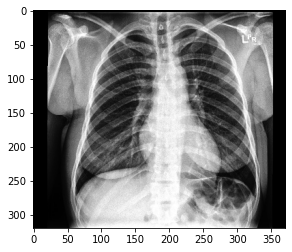

In [21]:
plt.imshow(im, cmap='gray')
plt.show()

In [22]:
im.shape

(320, 371)

In [23]:
im.size

118720

In [24]:
import torch

In [25]:
a = torch.from_numpy(im)

In [26]:
a.size()

torch.Size([320, 371])

In [31]:
normies.to_csv(os.path.join(data_path, 'CheXpert-v1.0-small','normals.csv'), index=False)

In [32]:
# find the json we made
import cv2

In [33]:
json_file = os.path.join(data_path, 'CheXpert-v1.0-small', 'valid', 'patient64579','study1','view1_frontal.json')

In [34]:
os.path.isfile(json_file)

True

In [35]:
import json

In [36]:
with open(json_file) as f:
    jsd= json.load(f)

In [37]:
jsd

{'version': '4.5.6',
 'flags': {},
 'shapes': [{'label': 'consolidation',
   'points': [[58.25531914893617, 270.2127659574468],
    [65.91489361702128, 258.2978723404255],
    [72.29787234042553, 249.7872340425532],
    [78.25531914893617, 240.0],
    [85.91489361702128, 234.04255319148936],
    [89.31914893617021, 231.48936170212764],
    [97.82978723404256, 226.80851063829786],
    [111.02127659574468, 222.9787234042553],
    [122.51063829787233, 217.44680851063828],
    [124.2127659574468, 222.9787234042553],
    [123.7872340425532, 233.1914893617021],
    [123.36170212765958, 241.27659574468083],
    [126.7659574468085, 252.7659574468085],
    [128.46808510638297, 259.1489361702128],
    [129.74468085106383, 264.25531914893617],
    [126.34042553191489, 266.8085106382979],
    [121.23404255319149, 266.8085106382979],
    [111.44680851063829, 265.1063829787234],
    [102.08510638297872, 265.1063829787234],
    [93.57446808510637, 265.531914893617],
    [85.91489361702128, 266.808510

In [38]:
import numpy as np

In [39]:
mask = np.zeros(shape=(jsd['imageHeight'], jsd['imageWidth']))

In [43]:
cv2.fillPoly(mask, np.array(jsd['shapes'][0]['points']), color=[255])

error: OpenCV(4.5.2) /tmp/pip-req-build-eirhwqtr/opencv/modules/imgproc/src/drawing.cpp:2395: error: (-215:Assertion failed) p.checkVector(2, CV_32S) >= 0 in function 'fillPoly'


In [42]:
np.array(jsd['shapes'][0]['points'])

array([[ 58.25531915, 270.21276596],
       [ 65.91489362, 258.29787234],
       [ 72.29787234, 249.78723404],
       [ 78.25531915, 240.        ],
       [ 85.91489362, 234.04255319],
       [ 89.31914894, 231.4893617 ],
       [ 97.82978723, 226.80851064],
       [111.0212766 , 222.9787234 ],
       [122.5106383 , 217.44680851],
       [124.21276596, 222.9787234 ],
       [123.78723404, 233.19148936],
       [123.36170213, 241.27659574],
       [126.76595745, 252.76595745],
       [128.46808511, 259.14893617],
       [129.74468085, 264.25531915],
       [126.34042553, 266.80851064],
       [121.23404255, 266.80851064],
       [111.44680851, 265.10638298],
       [102.08510638, 265.10638298],
       [ 93.57446809, 265.53191489],
       [ 85.91489362, 266.80851064],
       [ 75.70212766, 270.63829787],
       [ 63.78723404, 275.74468085],
       [ 58.25531915, 280.        ],
       [ 52.72340426, 286.38297872],
       [ 55.27659574, 275.74468085]])

In [44]:
!pip install labelme

     |████████████████████████████████| 1.5 MB 10.5 MB/s eta 0:00:01
     |████████████████████████████████| 7.7 MB 7.9 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 12.4 MB 12.3 MB/s eta 0:00:01
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Created wheel for labelme: filename=labelme-4.5.9-py3-none-any.whl size=1465407 sha256=d1eef77046b3ae25841fd1a8a72e96158e485a323e69b90b1c901faf1d53f9cc
  Stored in directory: /home/matt/.cache/pip/wheels/1c/45/df/66c625104a48f821f7fbf678d4c73a38c84347db57edf0a80a
  Created wheel for imgviz: filename=imgviz-1.2.6-py3-none-any.whl size=7674073 sha256=e1c55549d5fc151dbea864dc13c8805f52cd4ad6062eab210635a1c50eccd804
  Stored in directory: /home/matt/.cache/pip/wheels/75/20/06/d41e8f718f7b647376df3cd8106f094597201151bd1352f953
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=

In [45]:
from labelme import utils

In [47]:
mask = utils.shape_to_mask((jsd['imageHeight'], jsd['imageWidth']), jsd['shapes'][0]['points'])

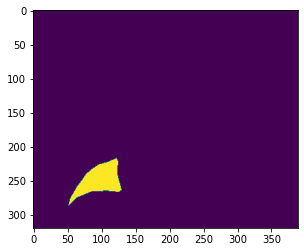

In [48]:
plt.imshow(mask)
plt.show()

In [49]:
# save the mask
mim = Image.fromarray(mask)

In [50]:
mim.save(os.path.join(data_path, 'CheXpert-v1.0-small', 'valid', 'patient64579','study1','view1_frontal_mask.jpg'))

In [52]:
os.path.basename('/data/matt/chexpert/CheXpert-v1.0-small/train/patient00004/study1/view1_frontal.jpg')

'view1_frontal.jpg'

In [27]:
os.path.join(data_path, 'CheXpert-v1.0-small', 'valid', 'patient64579','study1','view1_frontal_mask.jpg')

'/data/matt/chexpert/CheXpert-v1.0-small/valid/patient64579/study1/view1_frontal_mask.jpg'